<a href="https://colab.research.google.com/github/catalina-vargas/Tarea1_clasica/blob/main/codigo_tarea7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import RK45


# Definimos las variables de la ecuacion
g = 9.8
l = 3
lamda = 0.03
h = 0.2
w0 = np.sqrt(g/l) 
limite = np.sqrt((h*w0/2)**2 - 4*lamda**2)   # limite de estabilidad
epsilon = 1.4*limite  # variamos epsilon manualmente
w = w0+(epsilon/2)  

In [172]:
limite

0.17048949136725897

In [173]:
epsilon

0.23868528791416255

In [174]:
def ec_mathieu(t, y):
    """Ec. de Mathieu
    d2y/dt2 = -2*lamda*y[1] - w0**2*(1+h*cos(2*w*t))*y[0]
    Inputs:
    ======
    t : [float], tiempo
    y : [np.ndarray], [q, dq/dt]
    """
    output = np.array([y[1], -2*lamda*y[1] - w0**2*(1+h*np.cos(2*w*t))*y[0]])
    return output

t0 = 0  # tiempo inicial
tf = 50  # tiempo final
cond_inicial = np.array([np.pi/6, 0])   # np.array([angulo inicial, velocidad inicial])
RK5_scipy = RK45(ec_mathieu, t0, cond_inicial, tf, max_step=0.01, vectorized=True)

t = []
y = []
N_steps = 0
while RK5_scipy.t < tf:
    RK5_scipy.step()
    t.append(RK5_scipy.t)
    y.append(RK5_scipy.y[0])
    N_steps = N_steps + 1

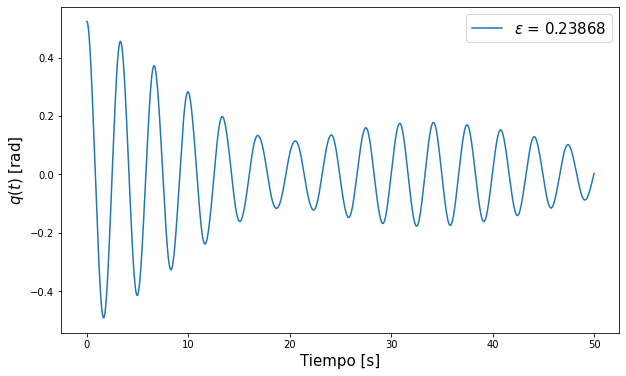

In [178]:
# Graficamos
plt.figure(0, figsize=(10,6))
plt.plot(t, y, label = r'$\epsilon$ = 0.23868')
plt.xlabel('Tiempo [s]', fontsize=15)
plt.ylabel(r'$q(t)$ [rad]', fontsize=15)
plt.legend(fontsize=15)